**Question 1**

In [2]:
import pandas as pd

# Loaded data from the provided URL into a pandas DataFrame
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Calculated mean age by occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)

# Created a binary column 'is_male' indicating whether the gender is male
users['is_male'] = users['gender'].apply(lambda x: x == 'M')

# Calculated male ratio by occupation
male_ratio_by_occupation = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)
print(male_ratio_by_occupation)

# To calculate minimum age by occupation
min_age_by_occupation = users.groupby('occupation')['age'].min()

# To calculate the maximum age by occupation
max_age_by_occupation = users.groupby('occupation')['age'].max()

# To print the minimum and maximum age by occupation
print(min_age_by_occupation)
print(max_age_by_occupation)

# To calculate the mean age by occupation and gender
mean_age_by_occupation_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occupation_and_sex)

# To calculate the total count by occupation
total_count_by_occupation = users.groupby('occupation')['gender'].count()

# To calculate the percentage of women by occupation
percentage_women_by_occupation = (users[users['gender'] == 'F'].groupby('occupation')['gender'].count() / total_count_by_occupation) * 100

# To calculate the percentage of men by occupation
percentage_men_by_occupation = (users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / total_count_by_occupation) * 100

# To print the percentage of women and men by occupation
print(percentage_women_by_occupation)
print(percentage_men_by_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.57

**Question 2**

In [18]:
# Import the necessary libraries
import pandas as pd

# Import the dataset
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

# Assign the dataset to a variable
euro12 = pd.DataFrame(euro12)
# step 4: Select only the Goal column
goal_column = euro12['Goals']

# Print the result
print(goal_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


**Question 3**

In [4]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

# Step 6: Check if 'bigcolumn' goes only until index 99
print(bigcolumn.index.max()) # This should print 99 if it goes until index 99

# Step 7: Reindex the DataFrame so it goes from 0 to 299
df = df.reindex(range(300))


299


**Question 4**

In [17]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Import the dataset from the attached file wind.txt
data = pd.read_csv('/Users/etinosaaigbede/Downloads/wind.txt', delim_whitespace=True)

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data['YrMoDy'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}))
data = data.set_index('YrMoDy')
data = data.drop(columns=['year', 'month', 'day'])

# Step 4: Create a function to fix the year 2061 and apply it
def fix_year(year):
    if year >= 61:
        return year + 1900
    else:
        return year + 2000

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

# Step 5: Set the right dates as the index with data type datetime64[ns]
data.index = pd.to_datetime(data.index)
data.index = data.index.astype('datetime64[ns]')

# Step 6: Compute how many values are missing for each location over the entire record
missing_values = data.isna().sum()

# Step 7: Compute how many non-missing values there are in total
non_missing_values = data.count().sum()

# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()

# Step 9: Create a DataFrame called loc_stats and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

# Step 10: Create a DataFrame called day_stats and calculate the min, max, mean, and standard deviations of the windspeeds across all the locations at each day
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

# Step 11: Find the average windspeed in January for each location
january_data = data[data.index.month == 1]
january_avg_windspeed = january_data.mean()

# Step 12: Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()

# Step 13: Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()

# Step 14: Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()

# Step 15: Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week for the first 52 weeks
weekly_stats = weekly_data.iloc[:52].describe().loc[['min', 'max', 'mean', 'std']]


ValueError: cannot assemble the datetimes: time data '610101' does not match format '%Y%m%d' (match)

**Question 5**

In [6]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from the given address
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

# Step 3: Assign it to a variable called chipo
# Already done in Step 2

# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("Number of observations: ", num_observations)

# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns: ", num_columns)

# Step 7: Print the name of all the columns
print("Columns: ", chipo.columns)

# Step 8: How is the dataset indexed?
print("Index: ", chipo.index)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item: ", most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Quantity of most-ordered item: ", most_ordered_item_count)

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print("Most ordered choice_description: ", most_ordered_choice_description)

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered: ", total_items_ordered)

# Step 13:
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
# Check the item price type
print("Type of item_price: ", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue: $", round(revenue, 2))

# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of orders: ", num_orders)

# Step 16: What is the average revenue amount per order?
avg_revenue_per_order = revenue / num_orders
print("Average revenue per order: $", round(avg_revenue_per_order, 2))

# Step 17: How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold: ", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

**Question 6**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage-divorce/marriage-divorce.csv'
df = pd.read_csv(url)

# Filter the data for the years between 1867 and 2014
df = df[(df['Year'] >= 1867) & (df['Year'] <= 2014)]

# Calculate per capita marriage and divorce rates
df['Marriages_per_capita'] = df['Marriages'] / df['Population']
df['Divorces_per_capita'] = df['Divorces'] / df['Population']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Marriages_per_capita'], label='Marriages per capita')
plt.plot(df['Year'], df['Divorces_per_capita'], label='Divorces per capita')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Add legend
plt.legend()

# Show the plot
plt.show()


HTTPError: HTTP Error 404: Not Found

**Question 7**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage-divorce/marriage-divorce.csv'
df = pd.read_csv(url)

# Filter the data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
df = df[df['Year'].isin(years)]

# Calculate per capita marriage and divorce rates
df['Marriages_per_capita'] = df['Marriages'] / df['Population']
df['Divorces_per_capita'] = df['Divorces'] / df['Population']

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Marriages_per_capita'], width=0.35, label='Marriages per capita')
plt.bar(df['Year'] + 0.35, df['Divorces_per_capita'], width=0.35, label='Divorces per capita')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Add legend
plt.legend()

# Show the plot
plt.show()


HTTPError: HTTP Error 404: Not Found

**Question 8**

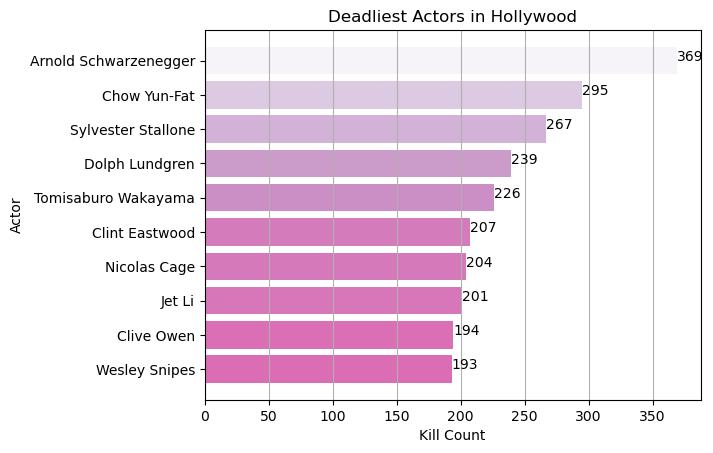

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the data from the CSV file
data = pd.read_csv('/Users/etinosaaigbede/Downloads/actor_kill_counts.csv')

# Step 2: Group the data by actor and sum the kills for each actor
grouped_data = data.groupby(['Actor'])['Count'].sum()

# Step 3: Sort the actors by their kill count
sorted_data = grouped_data.sort_values(ascending=True)

# Step 4: Create a horizontal bar chart with custom color scheme
colors = plt.cm.PuRd_r(sorted_data / float(max(sorted_data)))
plt.barh(sorted_data.index, sorted_data, color=colors)

# Step 5: Label each bar with the corresponding actor's name and value
for index, value in enumerate(sorted_data):
    plt.text(value, index, str(value))

# Step 6: Label the axes, add title, and turn on grid
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x')

# Display the plot
plt.show()

**Question 9**

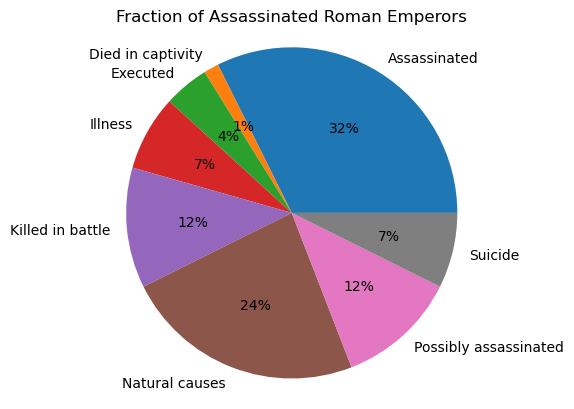

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/Users/etinosaaigbede/Downloads/roman-emperor-reigns.csv')

# Step 2: Group by cause of death and count the number of emperors
counts = data.groupby('Cause_of_Death').count()['Emperor']

# Step 3: Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.0f%%')
plt.title('Fraction of Assassinated Roman Emperors')
plt.axis('equal')
plt.show()

**Question 10**

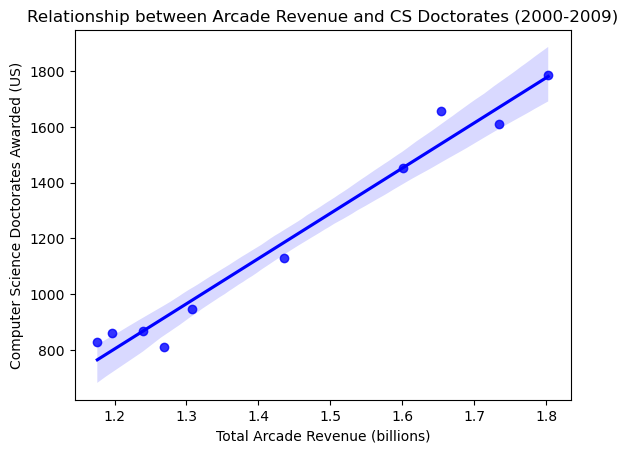

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/Users/etinosaaigbede/Downloads/arcade-revenue-vs-cs-doctorates.csv')

# Filter data by year
data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

# Create a scatter plot with a regression line
sns.regplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', data=data, color='blue')

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')

plt.show()